In [27]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from time import time
from datetime import timedelta

In [28]:
energy_consumption_df = pd.read_excel('data/EsaveExport_Trondheim Kommune_Trondheim_10121314.xls', parse_dates=['Unnamed: 0'], decimal=',', sheet_name='Export_0')
energy_temperature_df = pd.read_excel('data/ET Kurver.xlsx')
energy_meters_df = pd.read_excel('data/VIS Målere.xlsx')

In [29]:
energy_consumption_df.rename(columns={'Unnamed: 0': 'datetime'}, inplace=True)
energy_consumption_df.set_index('datetime', inplace=True)
energy_meters_df.set_index('Navn', inplace=True)

In [30]:
energy_consumption_df

,707057500068119547,707057500068755066,ESAVE_193681-980396002_EAN,707057500068789658,707057500068425556,707057500068402960,707057500068104048,707057500068744237,ESAVE_942110464_2_ID,707057500068750269,...,ESAVE_282798-980396002_EAN,707057500068742943,ESAVE_182900-980396002_EAN,707057500068702657,707057500068298990,707057500068614882,707057500068762040,707057500068392667,ESAVE_66267-980396002_EAN,707057500068415243
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,9.4,7.2,8.0,7.1,4.0,6.7,9.9,14.6,NaN,4.7,...,NaN,2.6,13.0,8.0,7.0,6.9,5.4,1.6,8.0,4.6
2015-01-01 01:00:00,9.6,7.2,9.0,7.0,7.0,8.6,10.0,14.6,NaN,2.9,...,NaN,2.8,12.0,6.5,8.0,7.8,5.0,1.8,9.0,4.7
2015-01-01 02:00:00,8.7,7.2,9.0,6.2,6.0,10.4,8.8,15.0,NaN,3.2,...,NaN,2.6,14.0,7.7,7.2,8.8,5.4,2.0,8.0,4.6
2015-01-01 03:00:00,8.8,7.2,9.0,7.8,5.0,10.2,10.2,16.6,NaN,5.3,...,NaN,2.8,12.0,6.7,7.2,9.4,4.6,1.9,7.0,5.0
2015-01-01 04:00:00,9.1,7.2,9.0,7.0,5.0,9.8,9.9,15.4,NaN,18.2,...,NaN,2.6,13.0,5.6,7.4,20.8,15.2,1.9,8.0,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 19:00:00,6.0,3.0,7.0,3.0,7.0,7.0,10.0,16.0,NaN,2.0,...,10.0,5.0,10.0,6.0,6.0,7.0,17.0,2.0,8.0,4.0
2020-01-01 20:00:00,7.0,2.0,6.0,6.0,6.0,7.0,11.0,15.0,NaN,3.0,...,9.0,5.0,11.0,8.0,4.0,8.0,16.0,1.0,8.0,5.0
2020-01-01 21:00:00,6.0,3.0,6.0,4.0,7.0,10.0,11.0,16.0,NaN,2.0,...,9.0,6.0,10.0,8.0,4.0,8.0,9.0,2.0,9.0,4.0


In [31]:
energy_temperature_df

,Bygg,Fra,DX1,DX2,DX3,DX4,DX5,DX6,DY1,DY2,...,DY4,DY5,DY6,ETXMin,ETXMax,ETYMin,ETXMax.1,Grunnlast,ETColor,Navn
0,Trondheim Kommune - Angelltrøa barnehage,03.01.2000,NaN,-14.0,13.0,20.0,NaN,NaN,NaN,3472.75,...,766.4,NaN,NaN,-15,20,0,6000,790.0,0,ET-kurve fra Entros EOS
1,Trondheim Kommune - Angelltrøa barnehage,03.01.2011,NaN,-13.5,14.9,26.8,NaN,NaN,NaN,3423.30,...,488.3,NaN,NaN,-20,30,0,6000,473.4,0,Angelltrøa bhg 20.01.2017 HL
2,Trondheim Kommune - Angelltrøa barnehage,18.08.2014,NaN,-2.7,3.8,6.0,15.5,20.0,NaN,2387.60,...,1300.0,720.0,720.0,-15,20,0,3000,720.0,7803FF,Angelltrøa bhg 20.01.2017 HL
3,Trondheim Kommune - Angelltrøa barnehage,01.01.2018,NaN,NaN,-13.6,0.2,13.0,20.0,NaN,NaN,...,2149.1,754.0,754.0,-15,23,0,4000,754.0,0,20190503 ØL: Ny ET-kurve
4,Trondheim Kommune - Angelltrøa barnehage,31.12.2018,NaN,NaN,-13.6,0.2,13.0,20.0,NaN,NaN,...,2149.1,754.0,754.0,-15,23,0,4000,754.0,0,27082019 SKB: Ny ET-kurve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,Trondheim Kommune - Buranhus AKKS musikksenter,01.01.2018,NaN,-13.3,15.7,29.2,NaN,NaN,NaN,2754.70,...,415.1,NaN,NaN,-20,30,0,4000,415.1,0,01102018 SKB: Ny ET-kurve
792,Trondheim Kommune - Uffa-huset Innherredsveien,01.01.2018,NaN,-13.4,3.0,6.1,13.0,20.0,NaN,3377.40,...,1623.6,772.5,772.5,-15,20,0,5000,772.5,0,20190411 ØL: Ny ET-kurve
793,Trondheim Kommune - Avanti,01.01.2018,NaN,-14.7,14.6,28.0,NaN,NaN,NaN,3583.00,...,602.3,NaN,NaN,-20,30,0,4500,602.3,0,01102018 SKB: Ny ET-kurve
794,Trondheim Kommune - Avanti,02.12.2019,NaN,-12.8,16.1,28.1,NaN,NaN,NaN,3410.60,...,585.1,NaN,NaN,-20,30,0,4500,585.1,0,20200109 VS: Ny ET-kurve


In [32]:
energy_meters_df

,Objekt,Type,Formel,UoM,Målernivå
Navn,,,,,
Trondheim Kommune - Ranheimsfjæra barnehage,Bygg,NaN,NaN,NaN,NaN
Trondheim Kommune - Hesteskoen barnehage,Bygg,NaN,NaN,NaN,NaN
Temp middel,VIS-Måler,Temperatur,Eklima_68860_TAM,°C,Annen måler
Trondheim Kommune - Torvet,Bygg,NaN,NaN,NaN,NaN
Fjernvarme 66217271,VIS-Måler,Fjernvarme,ESAVE_279829-980396002_EAN,kWh,Forbruksmåler
...,...,...,...,...,...
Trondheim Kommune - Angelltrøa barnehage,Bygg,NaN,NaN,NaN,NaN
Trondheim Voll,VIS-Måler,Temperatur,Eklima_68860_TAM,°C,Annen måler
Voll TAN,VIS-Måler,Temperatur,Eklima_68860_TAN,°C,Annen måler


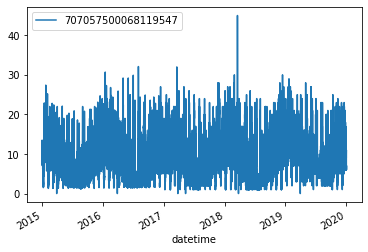

In [33]:
energy_consumption_df.plot(y='707057500068119547')
plt.show()

In [34]:
training_start = datetime(2019, 10, 1)
training_end = datetime(2019, 11, 4)
test_start = training_end + timedelta(hours=1)
test_end = datetime(2019, 11, 12)

t_data = energy_consumption_df['707057500068744237']
t_data.sort_index(inplace = True)
t_data.index = pd.DatetimeIndex(t_data.index).to_period('H')

training_data = t_data[training_start:training_end]
test_data = t_data[test_start:test_end]
test_data

datetime
2019-11-04 01:00    14.0
2019-11-04 02:00    17.0
2019-11-04 03:00    19.0
2019-11-04 04:00    14.0
2019-11-04 05:00    17.0
                    ... 
2019-11-11 20:00    20.0
2019-11-11 21:00    20.0
2019-11-11 22:00    19.0
2019-11-11 23:00    19.0
2019-11-12 00:00    24.0
Freq: H, Name: 707057500068744237, Length: 192, dtype: float64

In [35]:
model = SARIMAX(training_data, order=(1,1,1), seasonal_order=(1,0,1,24))

In [36]:
time_before = time()
model_fit = model.fit()
time_after = time()
print(f'Time used to fit model: {time_after - time_before} seconds')
print(model_fit.summary())

Time used to fit model: 2.1445021629333496 seconds
                                     SARIMAX Results                                      
Dep. Variable:                 707057500068744237   No. Observations:                  818
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 24)   Log Likelihood               -2037.386
Date:                            Wed, 02 Feb 2022   AIC                           4084.773
Time:                                    22:46:05   BIC                           4108.301
Sample:                                10-01-2019   HQIC                          4093.802
                                     - 11-04-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1213      0.263      0.461      0.645      -0.

In [37]:
pred_start = test_data.index[0]
pred_end = test_data.index[-1]

predictions = model_fit.predict(start=pred_start, end=pred_end)
error = predictions - test_data

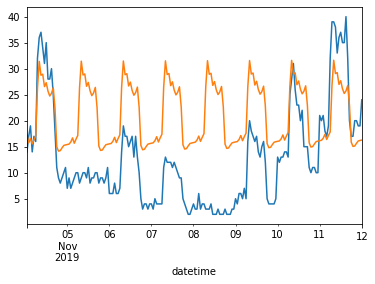

In [38]:
test_data.plot()
predictions.plot()
plt.show()

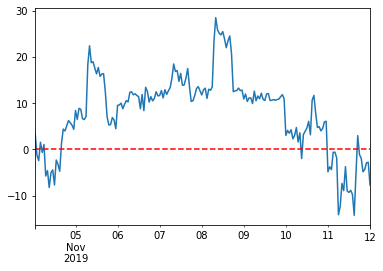

In [39]:
error.plot()
plt.axhline(y=0, color='r', linestyle='--')
plt.show()